# Basic Implementation

    2.1 Loading and Preparing Data


In [ ]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


     2.2 Building a Basic XGBoost Model

In [ ]:
# Initialize the model
model = xgb.XGBClassifier(use_label_encoder=False)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:41:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


       2.3 Training and Evaluating the Model


In [ ]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


# Model Evaluation Metrics

     Accuracy, Precision, Recall, F1 Score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


      For multiclass classification, you can compute the ROC-AUC score using OneVsRestClassifier:



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Fit model using OneVsRestClassifier
model = OneVsRestClassifier(xgb.XGBClassifier(use_label_encoder=False))
model.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = model.predict_proba(X_test)

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')
print(f"ROC-AUC: {roc_auc:.2f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:41:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ROC-AUC: 1.00


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:42:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:42:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:42:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:42:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:42:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-Validation Accuracy: 0.95 (+/- 0.02)


# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

# Initialize the model
model = xgb.XGBClassifier(use_label_encoder=False)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=0)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Print best parameters
print(f"Best Parameters: {grid_search.best_params_}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:46:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:46:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:46:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:46:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:46:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:46:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:46:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# 1. Advanced Hyperparameter Tuning


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Example data (replace with your actual data)
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = XGBClassifier()

# Define hyperparameters for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters (Grid Search):", grid_search.best_params_)


Best Parameters (Grid Search): {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}


# b. Random Search


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Example data (replace with your actual data)


# Define the model
model = XGBClassifier()

# Define hyperparameters for Random Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Perform Random Search
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters (Random Search):", random_search.best_params_)


Best Parameters (Random Search): {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01}


# c. Bayesian Optimization


In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score



# Define the search space
space = {
    'max_depth': hp.choice('max_depth', range(3, 8)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'n_estimators': hp.choice('n_estimators', range(100, 300)),
    'subsample': hp.uniform('subsample', 0.8, 1.0)
}

# Objective function
def objective(params):
    model = XGBClassifier(**params)
    accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return {'loss': -accuracy, 'status': STATUS_OK}

# Run Bayesian Optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# Print the best parameters
print("Best Parameters (Bayesian Optimization):", best)


100%|██████████| 50/50 [00:25<00:00,  1.98trial/s, best loss: -0.95]
Best Parameters (Bayesian Optimization): {'learning_rate': 0.01796138177552679, 'max_depth': 3, 'n_estimators': 13, 'subsample': 0.9119202016167863}


# 2. Handling Missing Values
    a. XGBoost’s Built-In Missing Value Handling

In [ ]:
from xgboost import XGBClassifier


# Create model with default settings
model = XGBClassifier()

# Fit the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


# b. Imputation Strategies


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier



# Simple Imputation with Mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Fit model
model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

# 3. Feature Engineering and Selection
    a. Feature Importance with XGBoost

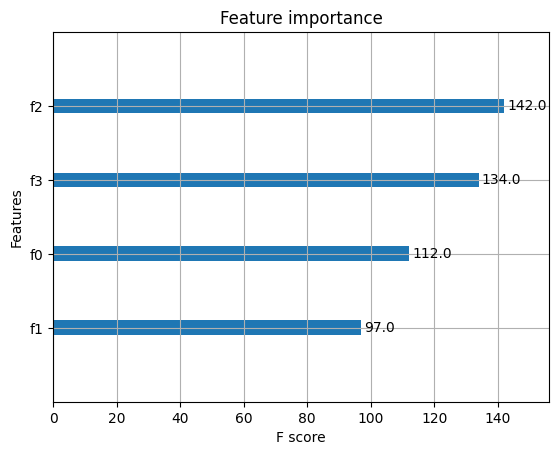

In [ ]:
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt



# Fit the model
model = XGBClassifier()
model.fit(X_train, y_train)

# Plot feature importance
plot_importance(model)
plt.show()


# b. Feature Selection with Recursive Feature Elimination (RFE)


In [ ]:
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
import pandas as pd
# load data
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)



# Define the model
model = XGBClassifier()

# RFE model
rfe = RFE(model, n_features_to_select=5) # Select top 5 features
rfe = rfe.fit(X_train, y_train)

# Selected features
# Get the indices of the selected features
selected_feature_indices = rfe.support_

# If you still have access to the original DataFrame (e.g., 'df') from which X_train was derived:
print("Selected Features: ", df.columns[selected_feature_indices])

# If you don't have the original DataFrame, just print the indices:
print("Selected Feature Indices: ", selected_feature_indices)

Selected Features:  Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
Selected Feature Indices:  [ True  True  True  True]


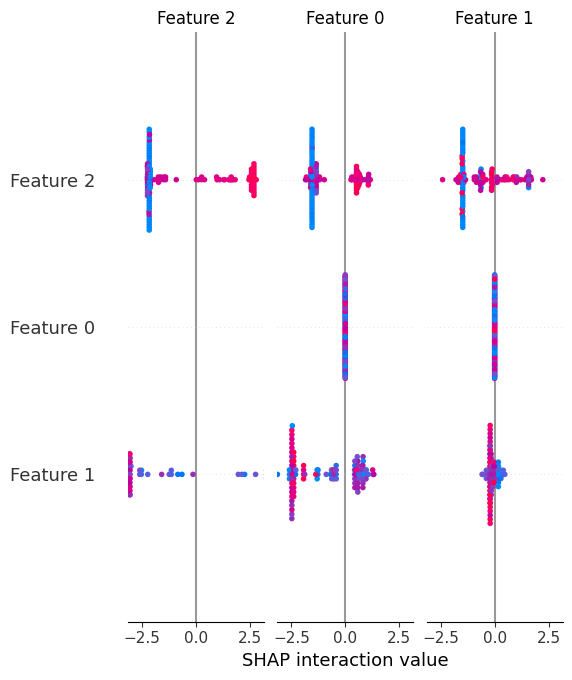

In [ ]:
import shap
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Assuming you have X_train and y_train defined from previous steps
# ... (your code to load and prepare data)

# Fit the model
model = XGBClassifier()
model.fit(X_train, y_train)

# Create the explainer object
explainer = shap.Explainer(model)

# Calculate SHAP values
shap_values = explainer(X_train)

# Plot SHAP feature importance
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Week 1: Advanced XGBoost Hyperparameters


In [ ]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Parameters with different learning rates
params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.01,  # Experiment with 0.01, 0.1, 0.3
    'max_depth': 6,
    'eval_metric': 'logloss'
}

# Train model
bst = xgb.train(params, dtrain, num_boost_round=500, evals=[(dtest, 'test')], early_stopping_rounds=10)

# Predict
y_pred = bst.predict(dtest)
predictions = [1 if value > 0.5 else 0 for value in y_pred]

# Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy with learning rate {params['learning_rate']}: {accuracy}")


[0]	test-logloss:0.65497
[1]	test-logloss:0.64708
[2]	test-logloss:0.63916
[3]	test-logloss:0.63156
[4]	test-logloss:0.62445
[5]	test-logloss:0.61742
[6]	test-logloss:0.61033
[7]	test-logloss:0.60366
[8]	test-logloss:0.59649
[9]	test-logloss:0.58990
[10]	test-logloss:0.58301
[11]	test-logloss:0.57634
[12]	test-logloss:0.56969
[13]	test-logloss:0.56341
[14]	test-logloss:0.55719
[15]	test-logloss:0.55096
[16]	test-logloss:0.54480
[17]	test-logloss:0.53881
[18]	test-logloss:0.53340
[19]	test-logloss:0.52762
[20]	test-logloss:0.52194
[21]	test-logloss:0.51643
[22]	test-logloss:0.51128
[23]	test-logloss:0.50585
[24]	test-logloss:0.50062
[25]	test-logloss:0.49573
[26]	test-logloss:0.49057
[27]	test-logloss:0.48555
[28]	test-logloss:0.48084
[29]	test-logloss:0.47597
[30]	test-logloss:0.47125
[31]	test-logloss:0.46695
[32]	test-logloss:0.46234
[33]	test-logloss:0.45814
[34]	test-logloss:0.45372
[35]	test-logloss:0.44938
[36]	test-logloss:0.44520
[37]	test-logloss:0.44097
[38]	test-logloss:0.43

In [ ]:
# Day 2: Max Depth (max_depth)

params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.1,
    'max_depth': 3,  # Experiment with 3, 6, 9
    'eval_metric': 'logloss'
}

# Train model
bst = xgb.train(params, dtrain, num_boost_round=500, evals=[(dtest, 'test')], early_stopping_rounds=10)

# Predict and accuracy
y_pred = bst.predict(dtest)
predictions = [1 if value > 0.5 else 0 for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy with max depth {params['max_depth']}: {accuracy}")


[0]	test-logloss:0.58740
[1]	test-logloss:0.52275
[2]	test-logloss:0.47235
[3]	test-logloss:0.42765
[4]	test-logloss:0.38913
[5]	test-logloss:0.35715
[6]	test-logloss:0.33209
[7]	test-logloss:0.30697
[8]	test-logloss:0.28488
[9]	test-logloss:0.26528
[10]	test-logloss:0.24982
[11]	test-logloss:0.23678
[12]	test-logloss:0.22303
[13]	test-logloss:0.21039
[14]	test-logloss:0.20074
[15]	test-logloss:0.19130
[16]	test-logloss:0.17893
[17]	test-logloss:0.17262
[18]	test-logloss:0.16728
[19]	test-logloss:0.15980
[20]	test-logloss:0.15591
[21]	test-logloss:0.15278
[22]	test-logloss:0.14559
[23]	test-logloss:0.14165
[24]	test-logloss:0.13924
[25]	test-logloss:0.13493
[26]	test-logloss:0.13142
[27]	test-logloss:0.13052
[28]	test-logloss:0.12751
[29]	test-logloss:0.12672
[30]	test-logloss:0.12428
[31]	test-logloss:0.12430
[32]	test-logloss:0.12231
[33]	test-logloss:0.12152
[34]	test-logloss:0.11943
[35]	test-logloss:0.11907
[36]	test-logloss:0.11971
[37]	test-logloss:0.11847
[38]	test-logloss:0.11

In [ ]:
# Minimum Child Weight (min_child_weight)


params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,  # Experiment with 1, 5, 10
    'eval_metric': 'logloss'
}

# Train model
bst = xgb.train(params, dtrain, num_boost_round=500, evals=[(dtest, 'test')], early_stopping_rounds=10)

# Predict and accuracy
y_pred = bst.predict(dtest)
predictions = [1 if value > 0.5 else 0 for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy with min_child_weight {params['min_child_weight']}: {accuracy}")


[0]	test-logloss:0.58921
[1]	test-logloss:0.52730
[2]	test-logloss:0.47376
[3]	test-logloss:0.42879
[4]	test-logloss:0.39063
[5]	test-logloss:0.36157
[6]	test-logloss:0.33429
[7]	test-logloss:0.31174
[8]	test-logloss:0.29004
[9]	test-logloss:0.26887
[10]	test-logloss:0.25026
[11]	test-logloss:0.23664
[12]	test-logloss:0.22159
[13]	test-logloss:0.21042
[14]	test-logloss:0.20015
[15]	test-logloss:0.18927
[16]	test-logloss:0.18089
[17]	test-logloss:0.17455
[18]	test-logloss:0.16700
[19]	test-logloss:0.16112
[20]	test-logloss:0.15695
[21]	test-logloss:0.15202
[22]	test-logloss:0.14771
[23]	test-logloss:0.14215
[24]	test-logloss:0.13778
[25]	test-logloss:0.13256
[26]	test-logloss:0.13073
[27]	test-logloss:0.12973
[28]	test-logloss:0.12838
[29]	test-logloss:0.12667
[30]	test-logloss:0.12267
[31]	test-logloss:0.12040
[32]	test-logloss:0.11909
[33]	test-logloss:0.11833
[34]	test-logloss:0.11631
[35]	test-logloss:0.11676
[36]	test-logloss:0.11634
[37]	test-logloss:0.11679
[38]	test-logloss:0.11

In [ ]:
#  Subsample and colsample_bytree


params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.1,
    'max_depth': 6,
    'subsample': 0.8,  # Experiment with 0.5, 0.8, 1.0
    'colsample_bytree': 0.8,  # Experiment with 0.5, 0.8, 1.0
    'eval_metric': 'logloss'
}

# Train model
bst = xgb.train(params, dtrain, num_boost_round=500, evals=[(dtest, 'test')], early_stopping_rounds=10)

# Predict and accuracy
y_pred = bst.predict(dtest)
predictions = [1 if value > 0.5 else 0 for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy with subsample {params['subsample']} and colsample_bytree {params['colsample_bytree']}: {accuracy}")


[0]	test-logloss:0.58688
[1]	test-logloss:0.51895
[2]	test-logloss:0.46750
[3]	test-logloss:0.42530
[4]	test-logloss:0.38574
[5]	test-logloss:0.35636
[6]	test-logloss:0.32989
[7]	test-logloss:0.30509
[8]	test-logloss:0.28371
[9]	test-logloss:0.26595
[10]	test-logloss:0.24711
[11]	test-logloss:0.23382
[12]	test-logloss:0.21999
[13]	test-logloss:0.20898
[14]	test-logloss:0.19566
[15]	test-logloss:0.18770
[16]	test-logloss:0.17949
[17]	test-logloss:0.17211
[18]	test-logloss:0.16632
[19]	test-logloss:0.16195
[20]	test-logloss:0.15419
[21]	test-logloss:0.14942
[22]	test-logloss:0.14598
[23]	test-logloss:0.14327
[24]	test-logloss:0.13996
[25]	test-logloss:0.13640
[26]	test-logloss:0.13436
[27]	test-logloss:0.13299
[28]	test-logloss:0.12987
[29]	test-logloss:0.12897
[30]	test-logloss:0.12516
[31]	test-logloss:0.12236
[32]	test-logloss:0.12103
[33]	test-logloss:0.11838
[34]	test-logloss:0.11522
[35]	test-logloss:0.11531
[36]	test-logloss:0.11209
[37]	test-logloss:0.10913
[38]	test-logloss:0.10

In [ ]:
# Regularization Parameters: lambda and alpha


params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.1,
    'max_depth': 6,
    'lambda': 1.0,  # Experiment with 0.1, 1.0, 10.0 (L2 regularization)
    'alpha': 0.5,  # Experiment with 0.1, 0.5, 1.0 (L1 regularization)
    'eval_metric': 'logloss'
}

# Train model
bst = xgb.train(params, dtrain, num_boost_round=500, evals=[(dtest, 'test')], early_stopping_rounds=10)

# Predict and accuracy
y_pred = bst.predict(dtest)
predictions = [1 if value > 0.5 else 0 for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy with lambda {params['lambda']} and alpha {params['alpha']}: {accuracy}")


[0]	test-logloss:0.58638
[1]	test-logloss:0.52572
[2]	test-logloss:0.47221
[3]	test-logloss:0.42833
[4]	test-logloss:0.39409
[5]	test-logloss:0.36135
[6]	test-logloss:0.33574
[7]	test-logloss:0.31157
[8]	test-logloss:0.29366
[9]	test-logloss:0.27162
[10]	test-logloss:0.25339
[11]	test-logloss:0.24001
[12]	test-logloss:0.22765
[13]	test-logloss:0.21735
[14]	test-logloss:0.20582
[15]	test-logloss:0.19753
[16]	test-logloss:0.18862
[17]	test-logloss:0.17910
[18]	test-logloss:0.17401
[19]	test-logloss:0.16747
[20]	test-logloss:0.16353
[21]	test-logloss:0.15832
[22]	test-logloss:0.15554
[23]	test-logloss:0.15029
[24]	test-logloss:0.14719
[25]	test-logloss:0.14341
[26]	test-logloss:0.13906
[27]	test-logloss:0.13736
[28]	test-logloss:0.13404
[29]	test-logloss:0.13233
[30]	test-logloss:0.12998
[31]	test-logloss:0.12952
[32]	test-logloss:0.12720
[33]	test-logloss:0.12756
[34]	test-logloss:0.12456
[35]	test-logloss:0.12466
[36]	test-logloss:0.12535
[37]	test-logloss:0.12511
[38]	test-logloss:0.12

# Week 2: Ensemble Methods with XGBoost
    Day 1: Combining XGBoost with Other Algorithms

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Combine with XGBoost using Voting Classifier
xgb_clf = xgb.XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=500)

# Ensemble
ensemble_clf = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb_clf)], voting='soft')
ensemble_clf.fit(X_train, y_train)

# Predict and accuracy
predictions = ensemble_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the ensemble model: {accuracy}")


Accuracy of the ensemble model: 0.956140350877193


In [ ]:
#  Stacking with XGBoost

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier

# Base models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_clf = xgb.XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=500)

# Meta model
lr = LogisticRegression()

# Stacking Classifier
stack = StackingClassifier(classifiers=[rf, xgb_clf], meta_classifier=lr, use_probas=True, average_probas=False)
stack.fit(X_train, y_train)

# Predict and accuracy
predictions = stack.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the stacked model: {accuracy}")


Accuracy of the stacked model: 0.956140350877193


In [ ]:
# Blending with XGBoost

from sklearn.model_selection import train_test_split

# Split data into train, validation, and test sets
X_train_blend, X_val_blend, y_train_blend, y_val_blend = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train base models on the training set
rf.fit(X_train_blend, y_train_blend)
xgb_clf.fit(X_train_blend, y_train_blend)

# Predict probabilities on validation set
rf_val_preds = rf.predict_proba(X_val_blend)[:, 1]
xgb_val_preds = xgb_clf.predict_proba(X_val_blend)[:, 1]

# Combine predictions (blending)
blend_val_preds = (rf_val_preds + xgb_val_preds) / 2

# Meta model (simple logistic regression)
lr = LogisticRegression()
lr.fit(blend_val_preds.reshape(-1, 1), y_val_blend)

# Predict on test set using blended predictions
rf_test_preds = rf.predict_proba(X_test)[:, 1]
xgb_test_preds = xgb_clf.predict_proba(X_test)[:, 1]
blend_test_preds = (rf_test_preds + xgb_test_preds) / 2
final_preds = lr.predict(blend_test_preds.reshape(-1, 1))

# Accuracy
accuracy = accuracy_score(y_test, final_preds)
print(f"Accuracy of the blended model: {accuracy}")


Accuracy of the blended model: 0.9649122807017544


#  Handling Imbalanced Data
    Techniques for Handling Class Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train XGBoost on the resampled dataset
xgb_clf = xgb.XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=500)
xgb_clf.fit(X_resampled, y_resampled)

# Predict and accuracy
predictions = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy after handling imbalance with SMOTE: {accuracy}")


Accuracy after handling imbalance with SMOTE: 0.9736842105263158


In [ ]:
# Using XGBoost for Imbalanced Datasets

params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.1,
    'max_depth': 6,
    'scale_pos_weight': 10,  # Adjust this based on the imbalance ratio
    'eval_metric': 'logloss'
}

# Train model with scale_pos_weight
bst = xgb.train(params, dtrain, num_boost_round=500, evals=[(dtest, 'test')], early_stopping_rounds=10)

# Predict and accuracy
y_pred = bst.predict(dtest)
predictions = [1 if value > 0.5 else 0 for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy with scale_pos_weight: {accuracy}")


[0]	test-logloss:0.64424
[1]	test-logloss:0.54137
[2]	test-logloss:0.47240
[3]	test-logloss:0.42079
[4]	test-logloss:0.37969
[5]	test-logloss:0.34744
[6]	test-logloss:0.32100
[7]	test-logloss:0.29988
[8]	test-logloss:0.28231
[9]	test-logloss:0.26736
[10]	test-logloss:0.25283
[11]	test-logloss:0.24092
[12]	test-logloss:0.22978
[13]	test-logloss:0.21971
[14]	test-logloss:0.21301
[15]	test-logloss:0.20841
[16]	test-logloss:0.20158
[17]	test-logloss:0.19749
[18]	test-logloss:0.19221
[19]	test-logloss:0.18979
[20]	test-logloss:0.18625
[21]	test-logloss:0.18348
[22]	test-logloss:0.18058
[23]	test-logloss:0.17807
[24]	test-logloss:0.17818
[25]	test-logloss:0.17629
[26]	test-logloss:0.17462
[27]	test-logloss:0.16972
[28]	test-logloss:0.16879
[29]	test-logloss:0.16806
[30]	test-logloss:0.16378
[31]	test-logloss:0.16000
[32]	test-logloss:0.16006
[33]	test-logloss:0.15650
[34]	test-logloss:0.15777
[35]	test-logloss:0.15533
[36]	test-logloss:0.15335
[37]	test-logloss:0.15257
[38]	test-logloss:0.15

# Advanced XGBoost Techniques
    Custom Loss Functions

In [ ]:
params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.1,
    'max_depth': 6,
    'scale_pos_weight': 10,  # Adjust this based on the imbalance ratio
    'eval_metric': 'logloss'
}

# Train model with scale_pos_weight
bst = xgb.train(params, dtrain, num_boost_round=500, evals=[(dtest, 'test')], early_stopping_rounds=10)

# Predict and accuracy
y_pred = bst.predict(dtest)
predictions = [1 if value > 0.5 else 0 for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy with scale_pos_weight: {accuracy}")


[0]	test-logloss:0.64424
[1]	test-logloss:0.54137
[2]	test-logloss:0.47240
[3]	test-logloss:0.42079
[4]	test-logloss:0.37969
[5]	test-logloss:0.34744
[6]	test-logloss:0.32100
[7]	test-logloss:0.29988
[8]	test-logloss:0.28231
[9]	test-logloss:0.26736
[10]	test-logloss:0.25283
[11]	test-logloss:0.24092
[12]	test-logloss:0.22978
[13]	test-logloss:0.21971
[14]	test-logloss:0.21301
[15]	test-logloss:0.20841
[16]	test-logloss:0.20158
[17]	test-logloss:0.19749
[18]	test-logloss:0.19221
[19]	test-logloss:0.18979
[20]	test-logloss:0.18625
[21]	test-logloss:0.18348
[22]	test-logloss:0.18058
[23]	test-logloss:0.17807
[24]	test-logloss:0.17818
[25]	test-logloss:0.17629
[26]	test-logloss:0.17462
[27]	test-logloss:0.16972
[28]	test-logloss:0.16879
[29]	test-logloss:0.16806
[30]	test-logloss:0.16378
[31]	test-logloss:0.16000
[32]	test-logloss:0.16006
[33]	test-logloss:0.15650
[34]	test-logloss:0.15777
[35]	test-logloss:0.15533
[36]	test-logloss:0.15335
[37]	test-logloss:0.15257
[38]	test-logloss:0.15